<a href="https://colab.research.google.com/github/G-Uttejv/fuzzycmeans/blob/main/fuzzycmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fuzzy-c-means 1.7.2 requires numpy<2.0.0,>=1.21.1, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 1.38.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using 

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from fcmeans import FCM

In [ ]:
data = pd.read_csv("/content/IRIS.csv")

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
k_values = range(2, 10)  # Test k values from 2 to 9
silhouette_scores = []


In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)


In [ ]:
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (based on silhouette score for KMeans): {optimal_k}")


Optimal number of clusters (based on silhouette score for KMeans): 2


In [ ]:
fcm = FCM(n_clusters=optimal_k) # Using the same optimal k found for KMeans
fcm.fit(X_scaled)


In [ ]:
data['cluster_fcm'] = fcm.predict(X_scaled)

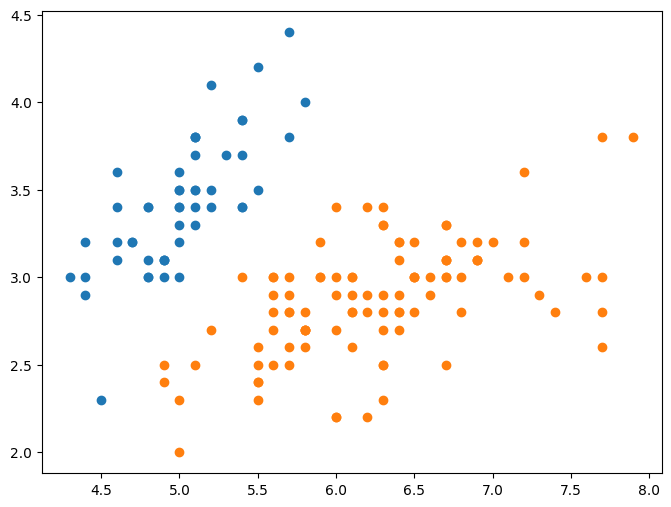

In [ ]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster_fcm'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')


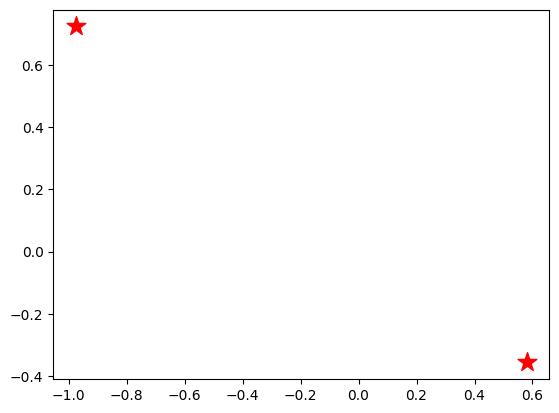

In [ ]:
plt.scatter(fcm.centers[:, 0], fcm.centers[:, 1], s=200, c='red', marker='*', label='Centroids') # Use fcm.centers for centroids

<ipython-input-21-11463c203375>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


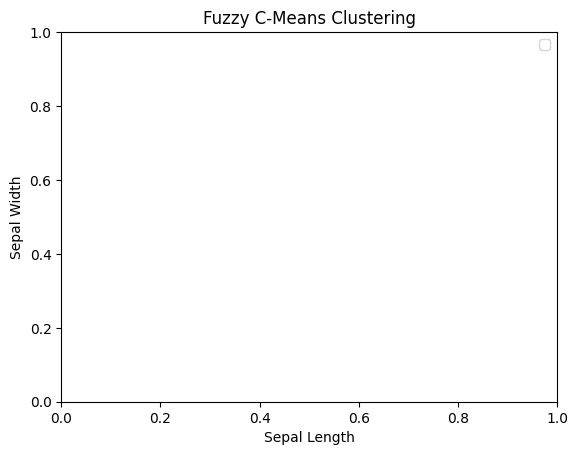

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()


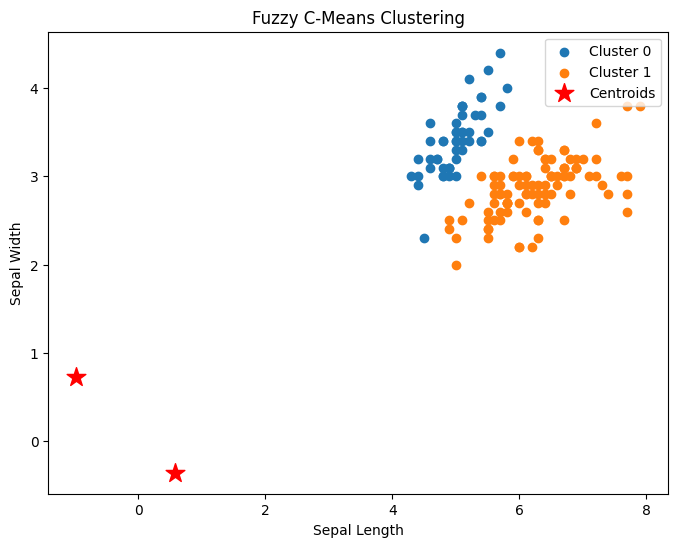

In [ ]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster_fcm'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')

plt.scatter(fcm.centers[:, 0], fcm.centers[:, 1], s=200, c='red', marker='*', label='Centroids') # Use fcm.centers for centroids
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()
